In [1]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_loaded = pd.read_csv('insurance_data_cleaned.csv')
df= df_loaded
print(df.head())

        age  sex       bmi  children  smoker  region_northwest  \
0 -1.438764    0 -0.454201 -0.908614       1                 0   
1 -1.509965    1  0.515300 -0.078767       0                 0   
2 -0.797954    1  0.388125  1.580926       0                 0   
3 -0.441948    1 -1.312218 -0.908614       0                 1   
4 -0.513149    1 -0.292342 -0.908614       0                 1   

   region_southeast  region_southwest  charges_scaled  
0                 0                 1        0.691394  
1                 1                 0       -1.790020  
2                 1                 0       -0.759500  
3                 0                 0        0.978513  
4                 0                 0       -0.912181  


In [2]:
# X_loaded = df_loaded.drop('charges_scaled', axis=1)

# y_loaded = df_loaded['charges_scaled'].values.reshape(-1, 1)

# X_train, X_test, y_train, y_test = train_test_split(
#     X_loaded, 
#     y_loaded, 
#     test_size=0.20, 
#     random_state=42 
# )

# #  Load the Scaler

# scaler_y = joblib.load('scaler_y.pkl') 

In [7]:
# Split into features and target
X = df.drop("charges_scaled", axis=1)   # replace with your target column
y = df["charges_scaled"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score(Accurcy):", r2)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)

Mean Squared Error: 0.20838015237616572
R² Score(Accurcy): 0.8041908038507756
            Feature  Coefficient
0               age     0.522878
1               sex    -0.080647
2               bmi     0.091648
3          children     0.121124
4            smoker     1.687916
5  region_northwest    -0.061482
6  region_southeast    -0.148804
7  region_southwest    -0.133867


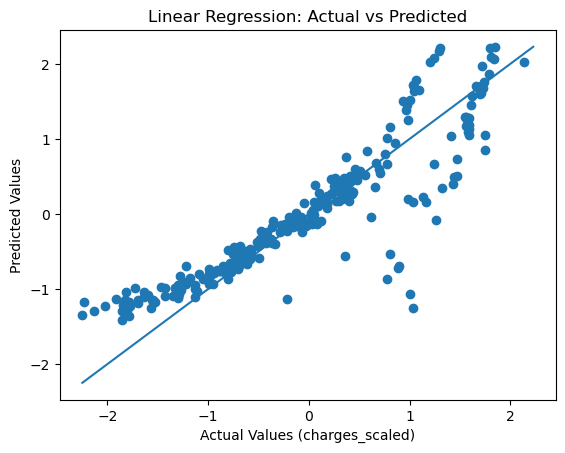

In [6]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (charges_scaled)")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")

# Ideal regression line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()